In [1]:
%load_ext autoreload
%autoreload 2

import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import json

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [2]:
plt.rcParams.update({'font.size': 11})
barwidth = 0.8

In [4]:
# Positive training dataset
posTrainDir = '/home/dashi/lulu/corpus/aclImdb/train/pos/'
# Negative training dataset
negTrainDir = '/home/dashi/lulu/corpus/aclImdb/train/neg/'
exampleDir = '/home/dashi/lulu/corpus/aclImdb/sample/'
filename = '/home/dashi/lulu/examples/data/9_4.txt'

In [5]:
nlp = spacy.load('en_core_web_md')

In [6]:
emos = loadEmotionWords('/home/dashi/lulu/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [7]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzePOS(doc)
print(counter)

Counter({'DET': 3, 'AUX': 2, 'NOUN': 2, 'PUNCT': 2, 'ADJ': 1, 'ADV': 1})


In [4]:
filename = '/home/dashi/lulu/examples/data/example_out.json'
with open(filename, 'w+') as f:
    json.dump(counter, f)

In [5]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzeSentence(doc)
print(counter)

SENTENCE : This is an awesome sentence.
SENTENCE : Where is the cat?
Counter({5: 1, 6: 1})


In [6]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzeWordLength(doc)
print(counter)

Counter({2: 3, 1: 2, 3: 2, 4: 1, 5: 1, 7: 1, 8: 1})


In [7]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzePunctuation(doc)
print(counter)

Counter({'?': 1, '.': 1})


In [8]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counterPos = analyzePOS(doc)
counterPunc = analyzePunctuation(doc)
print(sumCounter(counterPunc) / sumCounter(counterPos)) 

0.18181818181818182


In [9]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPunc = analyzePronoun(doc)
print(counterPunc) 

Counter({'it': 2, 'what': 1, 'who': 1, 'him': 1, 'their': 1, 'my': 1})


In [10]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPRP = analyzePronounPRP(doc)
print(counterPRP) 

Counter({'it': 2, 'him': 1})


In [11]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPRPD = analyzePronounPRPD(doc)
print(counterPRPD) 

Counter({'their': 1, 'my': 1})


In [12]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPWP = analyzePronounWP(doc)
print(counterPWP) 

Counter({'what': 1, 'who': 1})


In [13]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPWPD = analyzePronounWPD(doc)
print(counterPWPD) 

Counter()


In [14]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPCat = analyzePronounCategories(doc)
print(counterPCat) 

Counter({'PRP': 3, 'PRP$': 2, 'WP': 2})


In [15]:
parsed_text = 'This is an awesome sentence. I am running. It rains.'
doc = nlp(parsed_text)
counterVerb = analyzeVerb(doc)
print(counterVerb) 

Counter({'be': 2, 'rain': 1, 'run': 1})


In [5]:
parsed_text = 'This is not a good sentence. I am running. It rains.'
doc = nlp(parsed_text)
analyzeEmotionWords(doc, emos)
# counterEmo = analyzeEmotionWords(doc, emos)
# print(counterEmo) 

Counter({'! good': 1, '! sentence': 1})

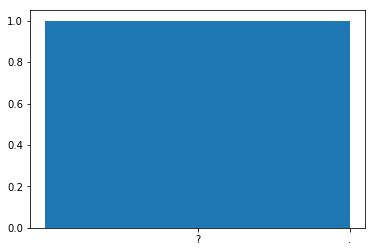

In [16]:
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

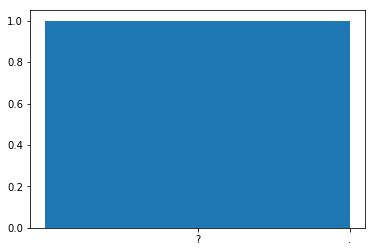

In [17]:
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

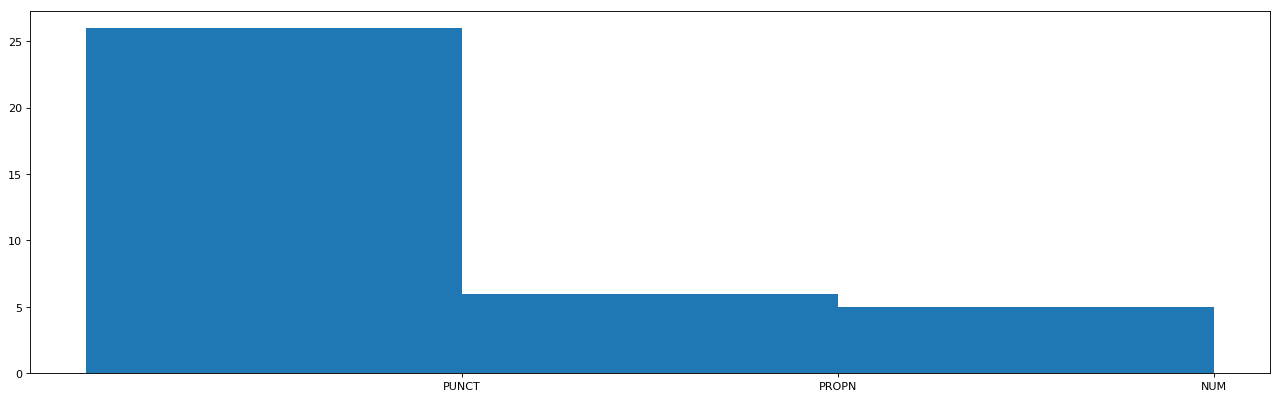

In [18]:
if __name__ == "__main__":  
    with open(filename, 'r') as f:
        text = f.read()
        nlp = spacy.load('en_core_web_md')
        doc = nlp(text)
        counter = analyzePOS(doc)
        
        plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

        labels, values = rankCounter(counter)
        indexes = np.arange(len(labels))
        width = 1
        plt.bar(indexes, values, width)
        plt.xticks(indexes + width * 0.5, labels)
        plt.show()
    f.close()
                


i : 0
i : 1
i : 2


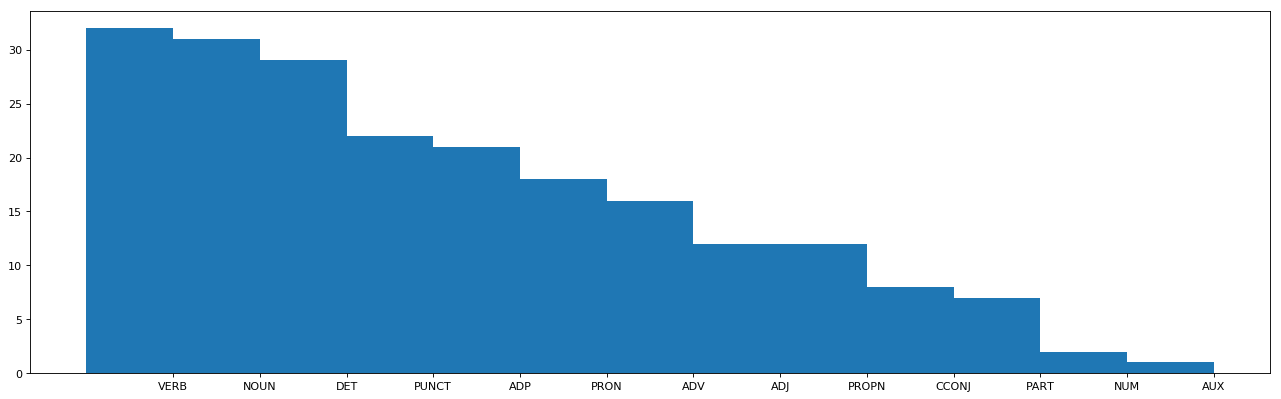

In [21]:
'''
POS histogram
error: doc input string cannot succeed 1 million characters
problem: iterating over text is too slow, parallelize
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter = analyzePOS(doc)
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
SENTENCE : At first glance, this film looks like the Keifer Sutherland series 24 for the big screen.
SENTENCE : With the focus on a plot to assassinate the President of the United States, a race against time, and plenty of Secret Service agents, the agency under the spotlight in The Sentinel.<br
SENTENCE : /><br
SENTENCE : />But
SENTENCE : wait, the protagonist turns out to be Michael Douglas' character Pete Garrison instead, a veteran Secret Service agent famed for taking the bullet for Reagan in 1981.
SENTENCE : The SS agents are specially trained to "take the bullet", which is what makes them special - who in the right mind will put themselves in the line of a bullet and a target?
SENTENCE : But Garrison gets implicated in the assassination plot, and has to run for his life while at the same time doing his bit of investigations into the plot.
SENTENCE : All this because of his failure in a polygraph test, due to his adulterous banging of the First Lady (Kim Basinger).
SENTENCE

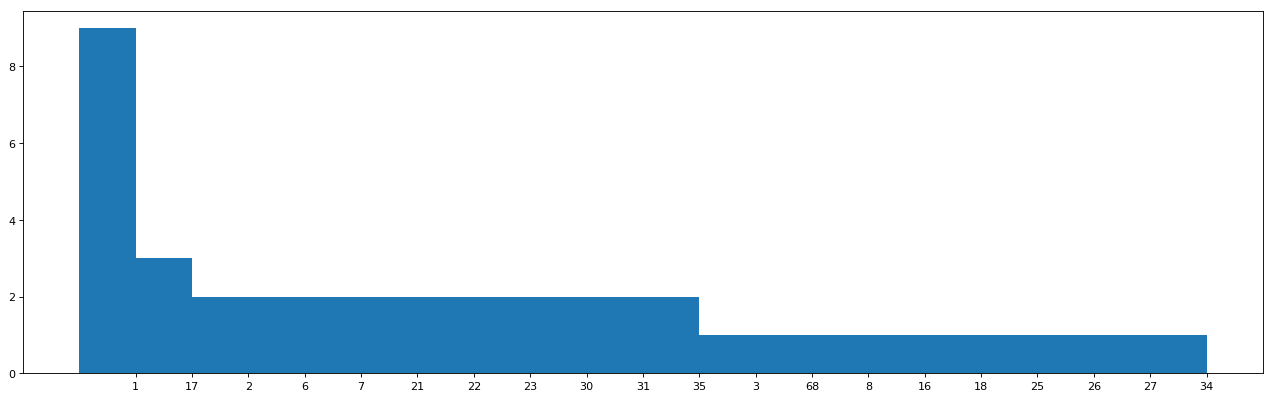

In [22]:
'''
Sentence length histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeSentence(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
average word lengths is : 4.118343195266272


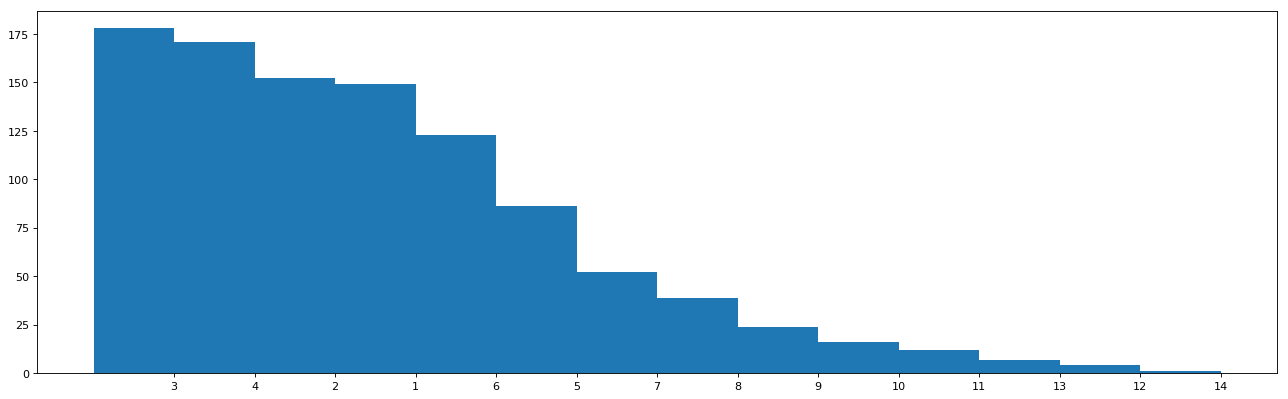

Counter({1: 9,
         2: 2,
         3: 1,
         6: 2,
         7: 2,
         8: 1,
         16: 1,
         17: 3,
         18: 1,
         21: 2,
         22: 2,
         23: 2,
         25: 1,
         26: 1,
         27: 1,
         30: 2,
         31: 2,
         34: 1,
         35: 2,
         38: 1,
         40: 1,
         44: 1,
         45: 1,
         47: 1,
         48: 1,
         56: 1,
         57: 1,
         68: 1})

In [23]:
'''
Word lengths histogram 
error: doc input string cannot succeed 1 million characters
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counterWord = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterWord += analyzeWordLength(doc) 
        i += 1

mean = sum([k*v for k, v in counterWord.items()]) / sumCounter(counterWord)
print('average word lengths is : ' + str(mean))

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterWord)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

counter

i : 0
i : 1
i : 2
percent of puncutation symbol is : 12.52465483234714


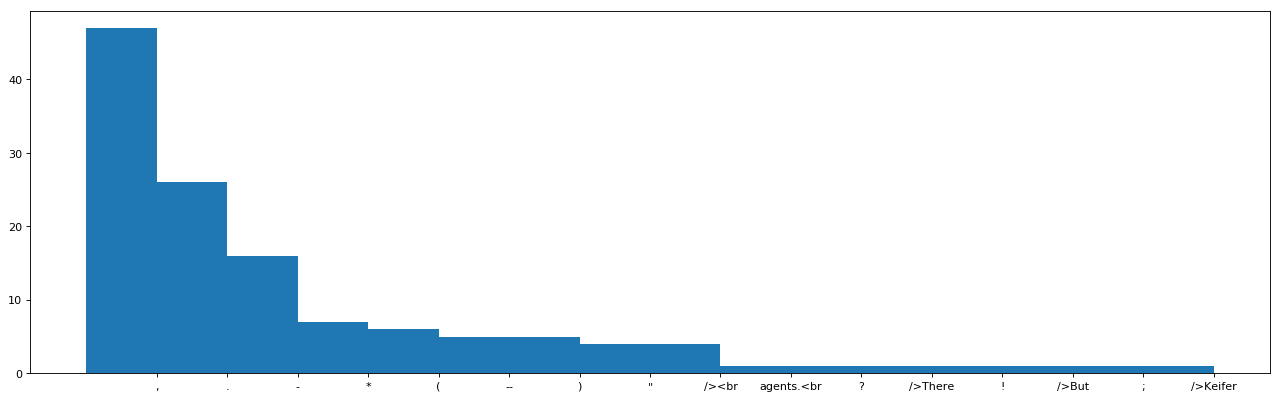

In [24]:
'''
Punctuation histogram
Percentage of punctuation out of total number of words
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counterPun = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPun += analyzePunctuation(doc) 
        i += 1
pert = sumCounter(counterPun) / sumCounter(counterWord)*100
print('percent of puncutation symbol is : ' + str(pert))
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPun)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'it': 12, 'i': 6, 'you': 5, 'his': 5, 'their': 5, 'who': 4, 'he': 3, 'her': 3, 'they': 3, 'them': 2, 'my': 2, 'we': 2, 'themselves': 1, 'its': 1, 'myself': 1, 'what': 1, 'she': 1})


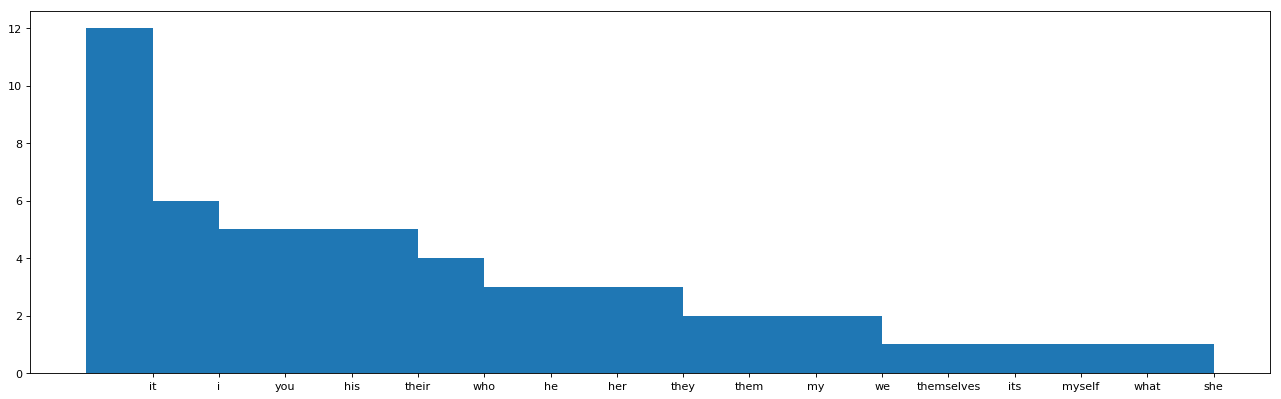

In [25]:
'''
Punctuation histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPron = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPron += analyzePronoun(doc) 
        i += 1
    
print(counterPron)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPron)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'it': 12, 'i': 6, 'you': 5, 'his': 5, 'their': 5, 'who': 4, 'he': 3, 'her': 3, 'they': 3, 'them': 2, 'my': 2, 'we': 2, 'themselves': 1, 'its': 1, 'myself': 1, 'what': 1, 'she': 1})


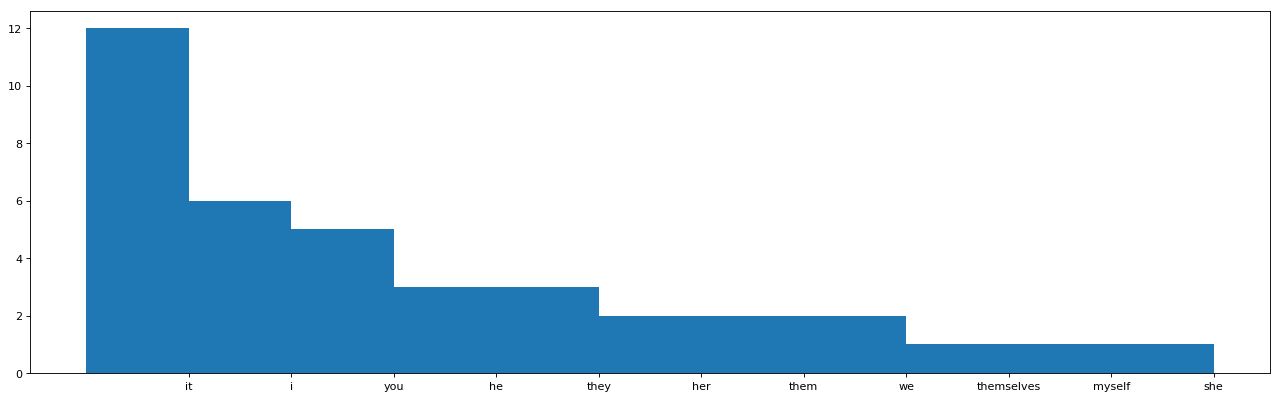

In [26]:
'''
Pronoun, personal histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronPRP = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronPRP += analyzePronounPRP(doc) 
        i += 1
    
print(counterPron)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'their': 5, 'his': 5, 'my': 2, 'her': 1, 'its': 1})


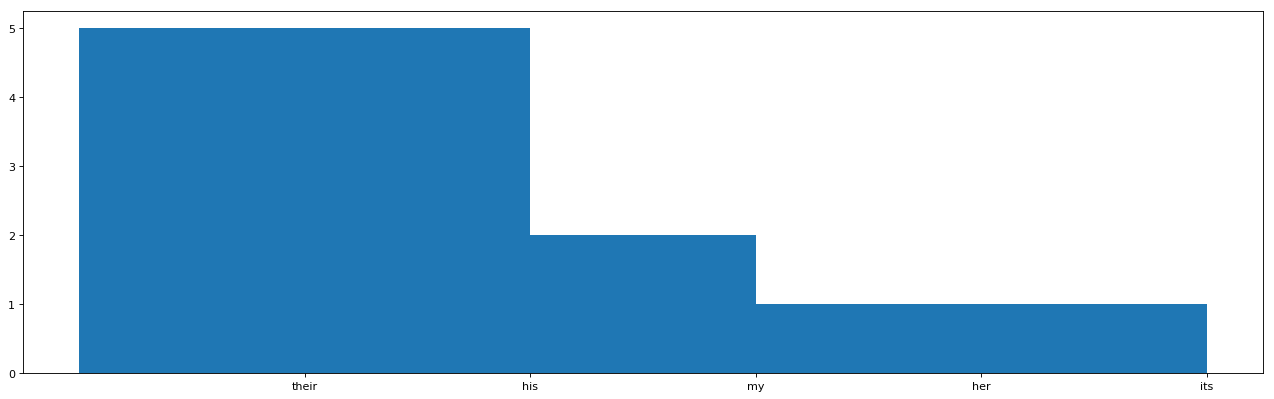

In [27]:
'''
pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronPRPD = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronPRPD += analyzePronounPRPD(doc) 
        i += 1
    
print(counterPronPRPD)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRPD)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'who': 4, 'what': 1})


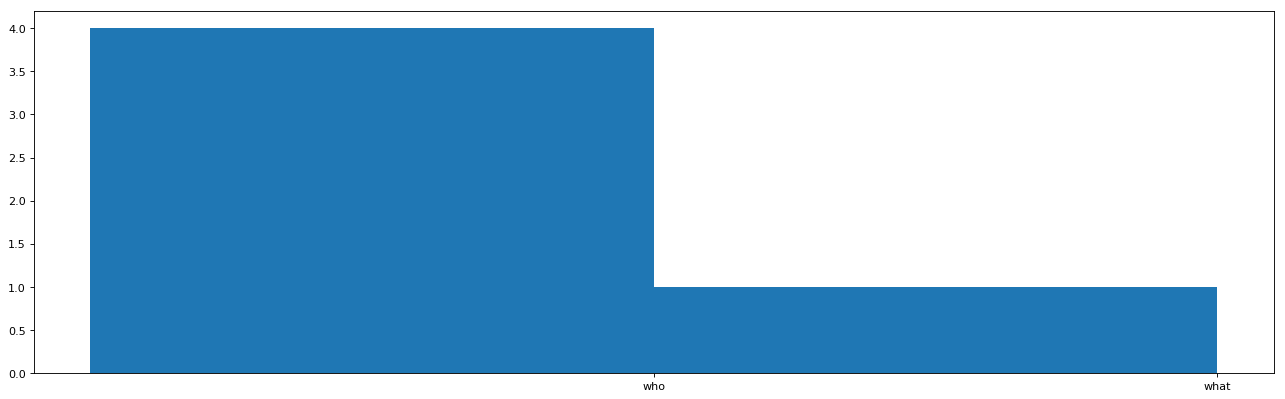

In [28]:
'''
pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronWP = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronWP += analyzePronounWP(doc) 
        i += 1
    
print(counterPronWP)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronWP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [29]:
'''
wh-pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronWPD = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronWPD += analyzePronounWPD(doc) 
        i += 1
    
print(counterPronWPD)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronWPD)
if labels and values:
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()

i : 0
i : 1
i : 2
Counter()


i : 0
i : 1
i : 2
Counter({'PRP': 38, 'PRP$': 14, 'WP': 5})


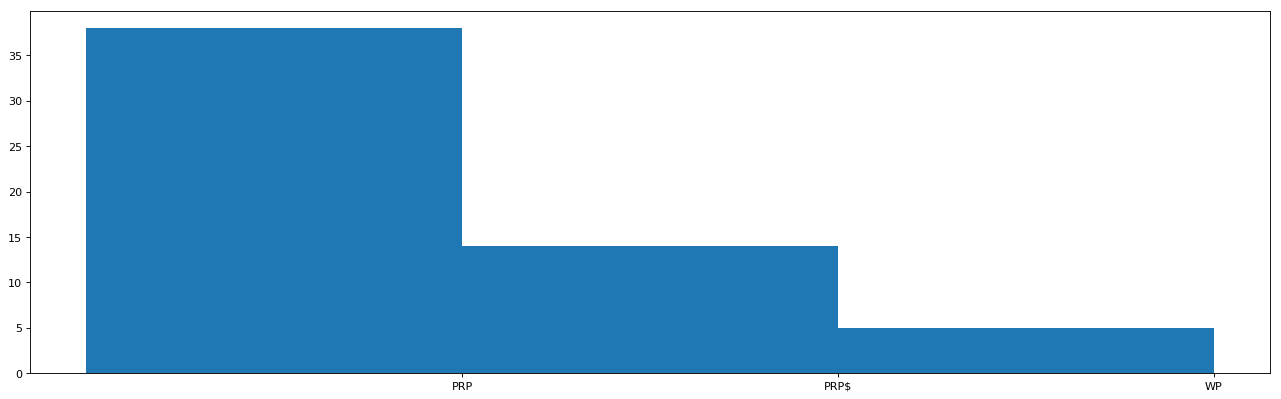

In [30]:
'''
4 pronoun categories histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronCat = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronCat += analyzePronounCategories(doc) 
        i += 1
    
print(counterPronCat)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronCat)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'be': 32, 'have': 12, 'do': 6, 'get': 5, 'take': 4, 'seem': 2, 'make': 2, 'look': 2, 'age': 2, 'will': 2, 'track': 2, 'see': 2, 'guess': 2, 'come': 2, 'turn': 2, 'find': 1, 'assassinate': 1, 'keep': 1, 'share': 1, 'satisfy': 1, 'mean': 1, 'fly': 1, 'train': 1, 'entertain': 1, 'become': 1, 'prefer': 1, 'deserve': 1, 'cover': 1, 'run': 1, 'wait': 1, 'swallow': 1, 'raise': 1, 'believe': 1, 'lay': 1, 'relegate': 1, 'implicate': 1, 'put': 1, 'move': 1, 'could': 1, 'watch': 1, 'rely': 1, 'tone': 1, 'listen': 1, 'feature': 1, 'shake': 1, 'resemble': 1, 'lept': 1, 'know': 1, 'end': 1, 'tell': 1, 'sing': 1, 'can': 1, 'follow': 1, 'face': 1, 'ala': 1, 'compare': 1, 'hunt': 1, 'ensue': 1, 'compromise': 1, 'verge': 1, 'fame': 1, 'outwit': 1, 'include': 1, 'suffer': 1, 'boil': 1})


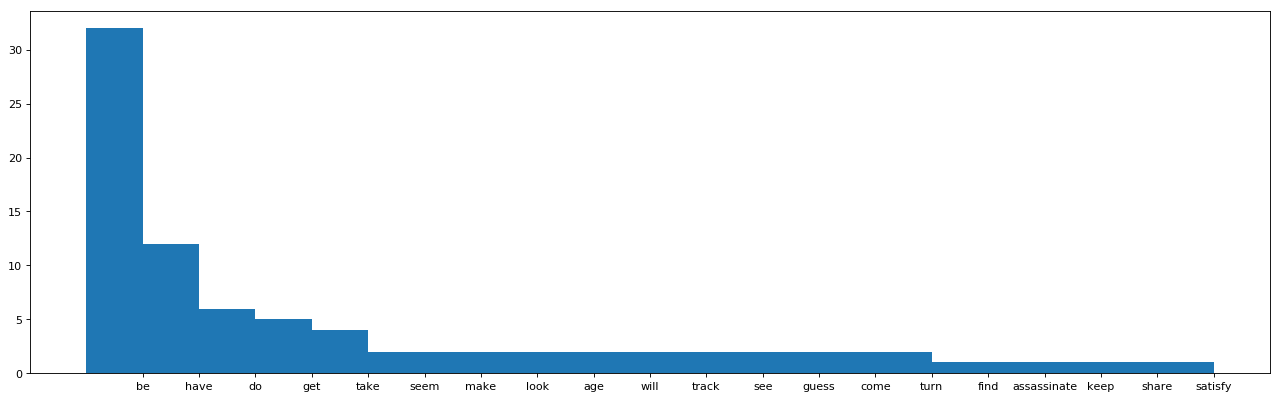

In [31]:
'''
Verb root words histogram
'''
read_files = glob.glob(directory + '*.txt')

counterVerbRoot = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterVerbRoot += analyzeVerb(doc) 
        i += 1
    
print(counterVerbRoot)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterVerbRoot)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'Garrison': 3, 'special': 2, 'action': 2, 'sing': 1, 'assassinate': 1, 'failure': 1, 'Sentinel': 1, 'lack': 1, 'share': 1, 'desperate': 1, 'reason': 1, 'fairly': 1, 'include': 1, 'powerful': 1, 'director': 1, 'rest': 1, 'title': 1, 'bland': 1, 'mess': 1, 'pleasant': 1, 'love': 1, 'happy': 1})


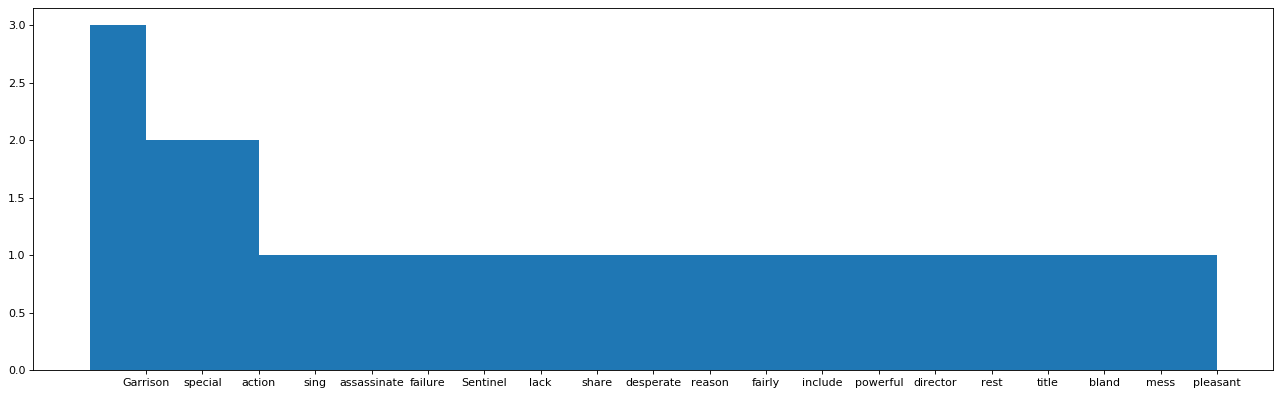

In [5]:
'''
Emotion words histogram
''' 
read_files = glob.glob(exampleDir + '*.txt')

emos = loadEmotionWords('/home/dashi/lulu/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')
counterEmos = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterEmos += analyzeEmotionWords(doc, emos) 
        i += 1
    
print(counterEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [8]:
'''
Emotion words histogram
'''
read_files = glob.glob(posTrainDir + '*.txt')

counterPosEmos = Counter('')
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPosEmos += analyzeEmotionWords(doc, emos) 
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1
    
print(counterPosEmos)

i : 0
i : 5000
i : 10000
Counter({'good': 6899, 'love': 3886, 'director': 1597, 'action': 1570, 'bad': 1566, 'enjoy': 1114, 'perfect': 1082, 'main': 961, 'special': 878, 'full': 839, 'lose': 777, 'mother': 755, 'star': 746, 'friend': 739, 'black': 722, 'rest': 721, 'word': 710, 'reason': 702, 'production': 701, 'fall': 682, 'late': 654, 'case': 622, 'art': 616, 'shoot': 607, '! good': 604, 'hit': 574, 'title': 568, 'evil': 567, 'score': 564, 'include': 563, 'musical': 558, 'sex': 555, 'wrong': 554, 'superb': 517, 'happy': 508, 'expect': 505, 'leave': 486, 'usual': 481, 'violence': 467, 'powerful': 444, 'famous': 434, 'cool': 434, 'unique': 433, 'interest': 423, 'level': 406, 'lack': 394, 'dance': 385, 'female': 368, 'romance': 363, 'deal': 360, 'subject': 354, 'doubt': 351, 'sweet': 349, 'present': 335, 'truth': 334, 'solid': 334, 'shot': 324, 'hate': 315, 'God': 312, 'effective': 311, 'interested': 310, 'adventure': 307, 'intelligent': 301, 'Star': 299, 'copy': 298, 'rating': 296, '! 

In [20]:
N = len(read_files)

counterPosEmosIdf = invDocFreq(counterPosEmos, N)

In [14]:
read_files = glob.glob(posTrainDir + '*.txt')

i = 0
totPosWords = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        totPosWords += totalWords(f) 
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1  

i : 0
i : 5000
i : 10000


In [32]:
N

12500

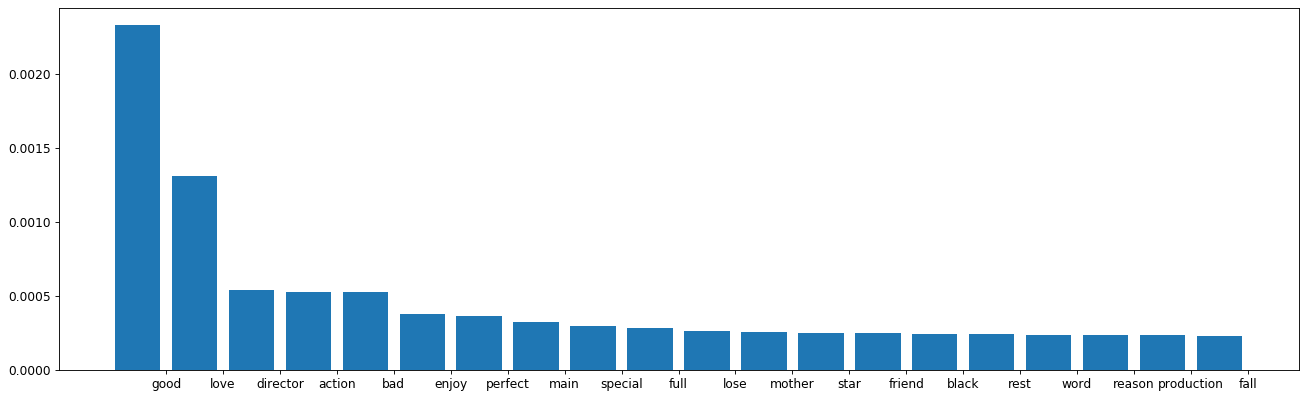

In [17]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPosEmos)
values = [v*1.0/totPosWords for v in values]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

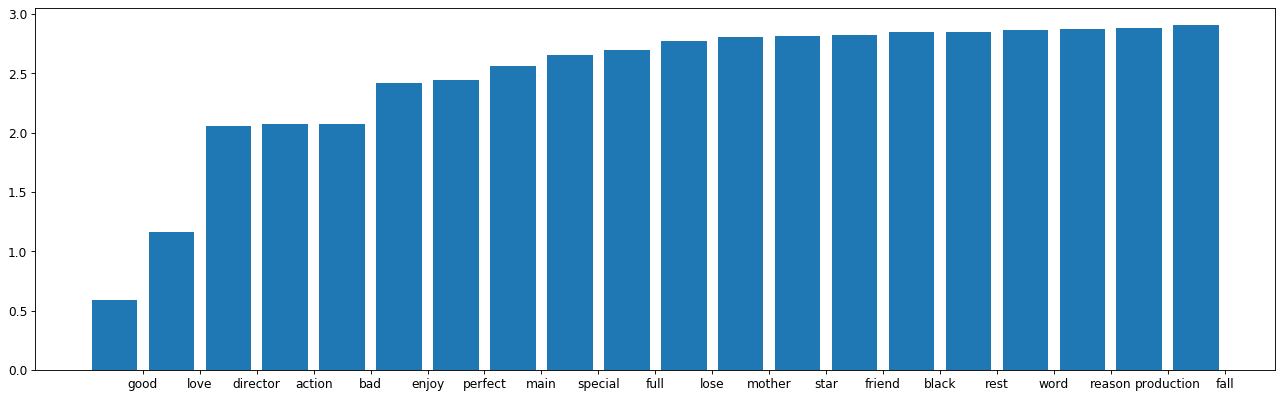

In [30]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
result = {k: v for k, v in sorted(counterPosEmosIdf.items(), key=lambda item: item[1])}
labels = list(result.keys())[:20]
values = list(result.values())[:20]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [29]:
list(result.values())

[0.5942072327050417,
 1.1680909924381693,
 2.0569757969641724,
 2.074016285034771,
 2.0765656809343715,
 2.4168742393961735,
 2.445993676289402,
 2.564469472624686,
 2.6546990256052156,
 2.700082031453033,
 2.7767573991120007,
 2.8054425471108595,
 2.817418738157575,
 2.8268337370921772,
 2.8500747011316276,
 2.8514587843975665,
 2.866811493487152,
 2.878127031479728,
 2.879550519264581,
 2.9069890637196023,
 2.9488486876551407,
 2.9989374045029393,
 3.008614899385005,
 3.0233090413242256,
 3.028255465259551,
 3.079113882493042,
 3.0896034891640616,
 3.091362504569241,
 3.0966581921439515,
 3.0984296717923336,
 3.1073344501352933,
 3.11271562903981,
 3.114515809543958,
 3.1835086810309097,
 3.20103590673987,
 3.206947254002927,
 3.2452198002078028,
 3.2555398092397922,
 3.2850156273727458,
 3.3354096411241523,
 3.358137892201708,
 3.358137892201708,
 3.3604393891899877,
 3.3837504680584347,
 3.4246707378477974,
 3.454598158389271,
 3.477646553825562,
 3.5226872792498654,
 3.53633005565

In [ ]:
'''
Emotion words histogram
'''
read_files = glob.glob(negTrainDir + '*.txt')

counterNegEmos = Counter('')
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterNegEmos += analyzeEmotionWords(doc, emos) 
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1
    
print(counterNegEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterNegEmos)
indexes = np.arange(len(labels))
values = [v*1.0/countNegTrain for v in values] 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

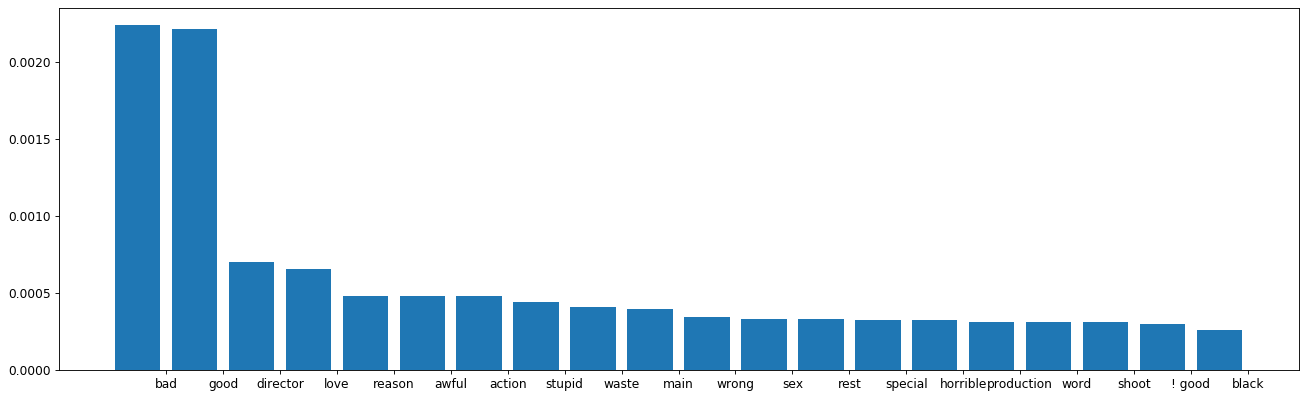

In [30]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterNegEmos)
indexes = np.arange(len(labels))
values = [v*1.0/countNegTrain for v in values] 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [11]:
'''
Emotion words histogram
''' 
directory = posTrainDir + '*.txt'
counterPosEmos = Counter('')
i = 0
print(len(counterPosEmos.keys()))
counterWordIdf = invDocFreq(counterPosEmos.keys(), directory)
    
print(counterWordIdf)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterWordIdf) 
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

0
Counter()


TypeError: object of type 'NoneType' has no len()

<Figure size 1600x480 with 0 Axes>

In [6]:
read_files = glob.glob(exampleDir + '*.txt')

i = 0
count = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        count += totalWords(f) 
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1  

i : 0


In [12]:
read_files = glob.glob(posTrainDir + '*.txt')

i = 0
totWords = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        totWords += totalWords(f) 
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1  

i : 0
i : 5000
i : 10000


In [13]:
print(countPosTrain)

2958696


In [14]:
read_files = glob.glob(negTrainDir + '*.txt')

i = 0
countNegTrain = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        countNegTrain += totalWords(f) 
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1  

i : 0
i : 5000
i : 10000


In [15]:
print(countNegTrain)

2885722
